In [60]:
import torch
import sklearn
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [61]:
iris = load_iris()
print("Features\n")
iris.data[0 : 10]

Features



array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [62]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [63]:
X=iris.data
y=iris.target

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print("Scaled data\n")
print(X[0:10])

Scaled data

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [65]:
X=torch.tensor(X,dtype=torch.float32)
y=torch.tensor(y,dtype=torch.float32)
X[0:10]

tensor([[-0.9007,  1.0190, -1.3402, -1.3154],
        [-1.1430, -0.1320, -1.3402, -1.3154],
        [-1.3854,  0.3284, -1.3971, -1.3154],
        [-1.5065,  0.0982, -1.2834, -1.3154],
        [-1.0218,  1.2492, -1.3402, -1.3154],
        [-0.5372,  1.9398, -1.1697, -1.0522],
        [-1.5065,  0.7888, -1.3402, -1.1838],
        [-1.0218,  0.7888, -1.2834, -1.3154],
        [-1.7489, -0.3622, -1.3402, -1.3154],
        [-1.1430,  0.0982, -1.2834, -1.4471]])

In [66]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(X,y,test_size=0.2,random_state=32)
print(Xtrain.size())
print(ytrain.size())
print(Xtest.size())
print(ytest.size())

torch.Size([120, 4])
torch.Size([120])
torch.Size([30, 4])
torch.Size([30])


In [67]:
import torch.nn as nn
import torch.nn.functional as F

In [68]:
class Model(nn.Module) :
  
  def __init__(self , n_features , n_L1) :
    super(Model,self).__init__()
    self.hiddenLayer=nn.Linear(n_features,n_L1)
    self.outptLayer=nn.Linear(n_L1,3)
    self.softmax=nn.Softmax(dim=1)

  def forward(self, data) :
    outputHiddenLayer=F.relu(self.hiddenLayer(data))
    outputOutputLayer=F.relu(self.outptLayer(outputHiddenLayer))
    output=self.softmax(outputOutputLayer)
    return output


In [69]:
def train(model, X_Train, y_Train, epocs, batchSize=20, seed=20) :
  
  cost=[]
  torch.manual_seed(seed)
  optimizer=torch.optim.SGD(model.parameters(),lr=0.1)
  loss_fn = nn.CrossEntropyLoss()

  for epoch in range(epocs) :

    suffle_idx=torch.randperm(y_Train.size(0))
    batches =torch.split(suffle_idx,batchSize)

    for idx in batches :

      pred = model.forward(X_Train[idx])
      loss = loss_fn(pred,y_Train[idx].long())

      optimizer.zero_grad()
      loss.backward()

      optimizer.step()

    with torch.no_grad():
      pred = model.forward(X_Train)
      loss = loss_fn(pred,y_Train.long())
      print('Epoc:%3d ' % epoch,end="")
      print('BCE %.2f' % loss)
      cost.append(loss)

  return cost


In [70]:
model = Model(Xtrain.size(1) , 10)
cost = train(model, Xtrain, ytrain, epocs = 30)

Epoc:  0 BCE 1.11
Epoc:  1 BCE 1.10
Epoc:  2 BCE 1.08
Epoc:  3 BCE 1.06
Epoc:  4 BCE 1.04
Epoc:  5 BCE 1.02
Epoc:  6 BCE 0.99
Epoc:  7 BCE 0.97
Epoc:  8 BCE 0.95
Epoc:  9 BCE 0.92
Epoc: 10 BCE 0.91
Epoc: 11 BCE 0.89
Epoc: 12 BCE 0.87
Epoc: 13 BCE 0.86
Epoc: 14 BCE 0.85
Epoc: 15 BCE 0.84
Epoc: 16 BCE 0.83
Epoc: 17 BCE 0.83
Epoc: 18 BCE 0.82
Epoc: 19 BCE 0.81
Epoc: 20 BCE 0.81
Epoc: 21 BCE 0.80
Epoc: 22 BCE 0.80
Epoc: 23 BCE 0.79
Epoc: 24 BCE 0.78
Epoc: 25 BCE 0.78
Epoc: 26 BCE 0.77
Epoc: 27 BCE 0.77
Epoc: 28 BCE 0.76
Epoc: 29 BCE 0.76


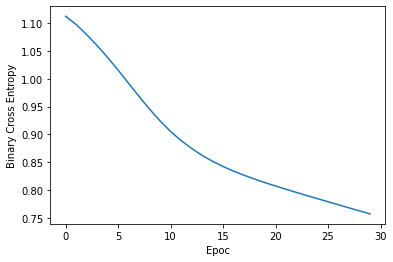

In [71]:
plt.plot(range(len(cost)),cost)
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoc')
plt.show()

In [72]:
with torch.no_grad():
  predTrain = model.forward(Xtrain)
  accTrain = (torch.argmax(predTrain,dim=1)==ytrain).float().mean()
  print('Training Accuracy: %.2f' %accTrain)

  predTest = model.forward(Xtest)
  accTest = (torch.argmax(predTest,dim=1)==ytest).float().mean()
  print('Testing Accuracy: %.2f' %accTest)

Training Accuracy: 0.87
Testing Accuracy: 0.87


In [73]:
ytrain

tensor([1., 0., 0., 2., 1., 0., 0., 2., 2., 1., 0., 2., 0., 2., 0., 2., 1., 1.,
        1., 0., 1., 1., 0., 2., 1., 0., 0., 0., 0., 1., 2., 2., 1., 1., 2., 2.,
        0., 2., 0., 0., 2., 0., 2., 0., 2., 0., 1., 0., 0., 1., 1., 2., 0., 1.,
        0., 1., 0., 2., 1., 1., 2., 1., 0., 1., 2., 2., 1., 2., 0., 2., 2., 2.,
        0., 2., 1., 2., 1., 2., 1., 1., 1., 0., 2., 2., 1., 1., 2., 0., 2., 1.,
        2., 2., 1., 1., 0., 1., 2., 2., 1., 0., 1., 2., 2., 1., 0., 0., 0., 1.,
        2., 2., 0., 0., 0., 1., 1., 1., 2., 1., 2., 0.])